<a href="https://colab.research.google.com/github/tbeucler/2022_Intro_Python/blob/main/Week4_2_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization with Seaborn

Reference:
1. Python Data Science Handbook (https://www.oreilly.com/library/view/python-data-science/9781491912126/)
2. mlcourse.ai (https://mlcourse.ai/book/topic02/topic02_additional_seaborn_matplotlib_plotly.html)
3. DataCamp data-science and machine learning courses (https://github.com/ozlerhakan/datacamp)

## **Seaborn Versus Matplotlib**

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.

We will show that using simple settings arguments, we can create aesthetically pleasing plots with `seaborn`

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

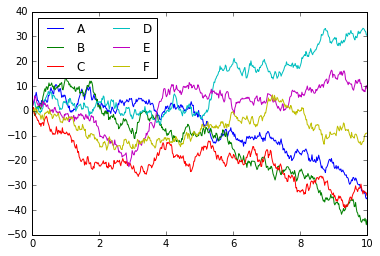

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

This is what we get from matplotlib without changing any settings. It's okay, but looks kind of ugly. Can we do better?

Importing `seaborn` brings a lot of good. While you can use `seaborn` plotting functions, importing the package will overwrite a lot of the plotting settings in the matplotlib. So simply rerunning the script above will yield a better figure!

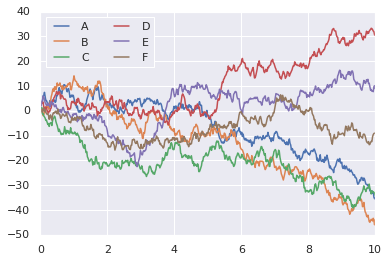

In [4]:
import seaborn as sns
sns.set()

# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Datasets with `seaborn`

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

In [5]:
import pandas as pd
df = pd.read_csv('./schoolimprovement2010grants.csv')
df.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

In [16]:
isWEST,isSOUTH = df['Region']=='West',df['Region']=='South'
dfWEST,dfSOUTH = df[isWEST],df[isSOUTH]

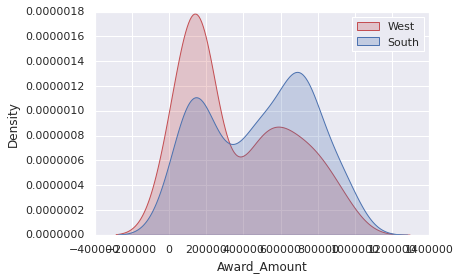

In [20]:
colors=['r','b']
labels = ['West','South']
for ind,obj in enumerate([dfWEST,dfSOUTH]):
  sns.kdeplot(obj['Award_Amount'], shade=True,color=colors[ind],label=labels[ind])
plt.legend(loc=1)
plt.show()

Histograms and KDE can be combined using ``distplot``:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


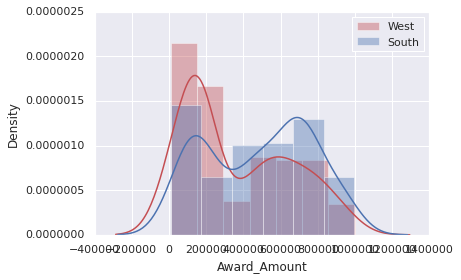

In [23]:
colors=['r','b']
labels = ['West','South']
for ind,obj in enumerate([dfWEST,dfSOUTH]):
  sns.distplot(obj['Award_Amount'],color=colors[ind],label=labels[ind])
plt.legend(loc=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


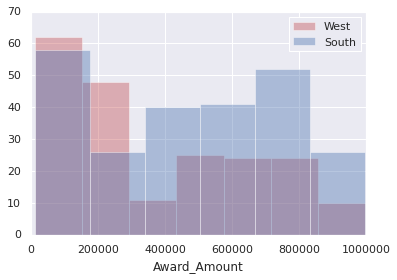

In [24]:
for ind,obj in enumerate([dfWEST,dfSOUTH]):
  sns.distplot(obj['Award_Amount'],kde=False,color=colors[ind],label=labels[ind])
plt.legend(loc=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


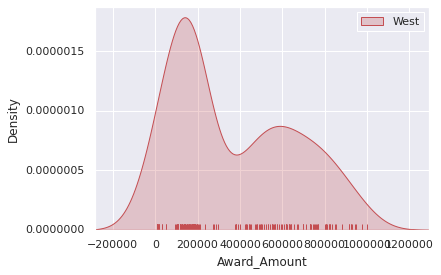

In [28]:
sns.distplot(dfWEST['Award_Amount'],color='r',label='West',hist=False,rug=True,kde_kws={'shade':True})
plt.legend(loc=1)
plt.show()

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


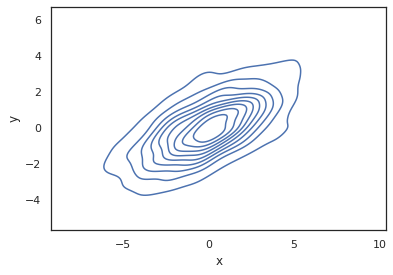

In [34]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
sns.kdeplot(data['x'],data['y']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'hist', 'kde_kws'
  **contour_kws,


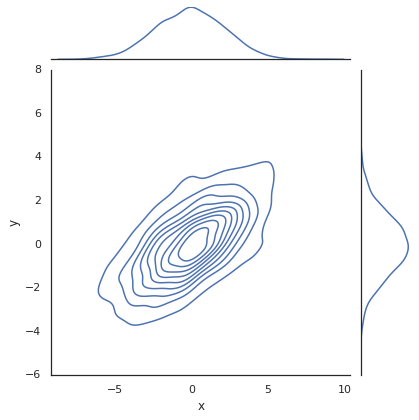

In [38]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde',hist=True,kde_kws={'shade':True});

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


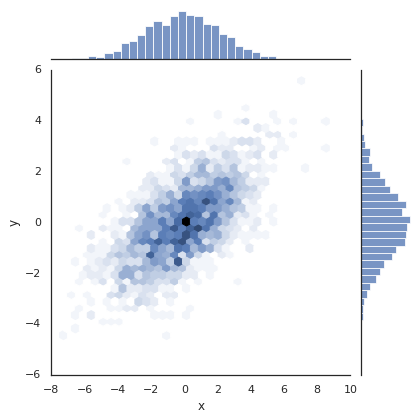

In [36]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

Click this [link](https://seaborn.pydata.org/generated/seaborn.jointplot.html) for other settings in the `jointplot()` method

#### **Changing plotting styles in Seaborn**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


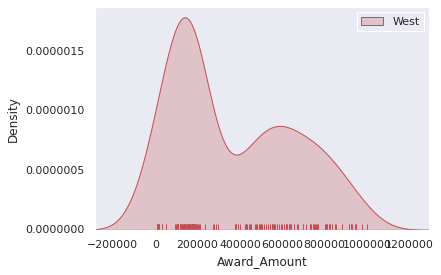

In [29]:
# Plot with a dark style 
sns.set_style('dark')
sns.distplot(dfWEST['Award_Amount'],color='r',label='West',hist=False,rug=True,kde_kws={'shade':True})
plt.legend(loc=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


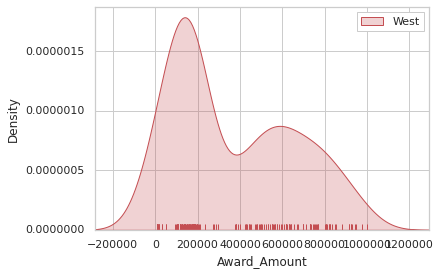

In [31]:
sns.set_style('whitegrid')
sns.distplot(dfWEST['Award_Amount'],color='r',label='West',hist=False,rug=True,kde_kws={'shade':True})
plt.legend(loc=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


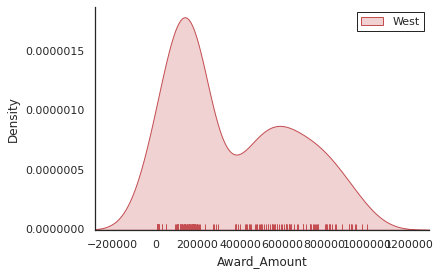

In [32]:
# Set the style to white
sns.set_style('white')
sns.distplot(dfWEST['Award_Amount'],color='r',label='West',hist=False,rug=True,kde_kws={'shade':True})
plt.legend(loc=1)
# Remove the spines
sns.despine()
# Show the plot and clear the figure
plt.show()

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [39]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


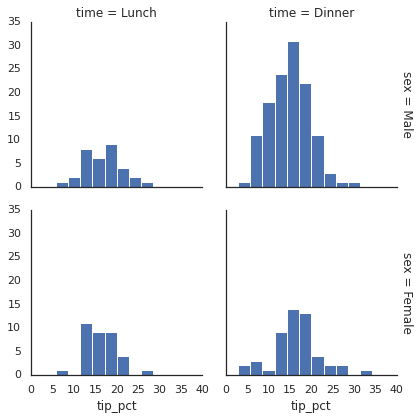

In [40]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


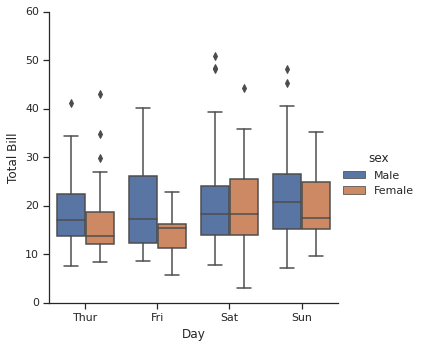

In [41]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Bar plots

Time series can be plotted using ``sns.factorplot``. In the following example, we'll use the Planets data

In [42]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


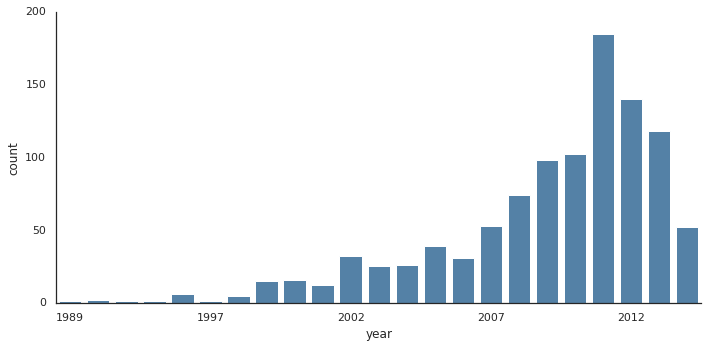

In [43]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


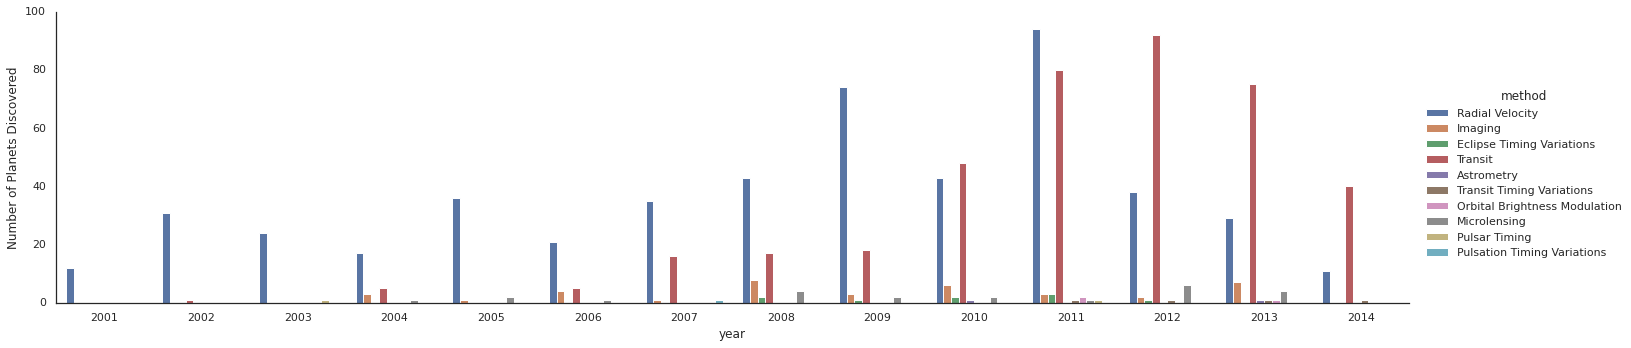

In [44]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### Heat Maps

The last type of plot that we will cover here is a heat map. A heat map allows you to view the distribution of a numerical variable over two categorical ones.

In [45]:
df = pd.read_csv('./daily_show_guests_cleaned.csv')
df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [46]:
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
pd_crosstab

YEAR,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Group,,,,,,,,,,,,,,,,,
Academic,0,0,2,0,4,1,12,9,13,5,11,8,10,8,8,10,2
Acting,108,100,92,84,74,51,44,44,25,26,22,45,42,33,60,47,33
Advocacy,0,1,0,1,0,4,0,0,2,3,1,1,1,2,2,3,3
Athletics,0,3,1,2,0,2,2,5,4,1,7,5,2,7,4,4,3
Business,0,1,0,0,0,2,1,1,2,1,4,2,3,3,3,1,1
Clergy,0,0,0,1,1,1,0,0,1,0,1,0,1,2,0,0,0
Comedy,25,12,11,5,12,7,5,8,9,7,7,7,7,6,6,9,7
Consultant,0,0,0,0,1,4,1,4,2,3,2,1,0,0,0,0,0
Government,0,0,2,1,2,3,1,3,1,0,5,3,3,3,7,6,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text major ticklabel objects>)

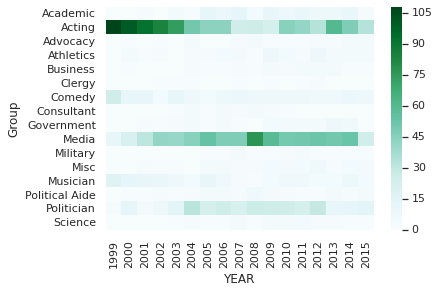

In [48]:
# Plot a heatmap of the table
sns.heatmap(pd_crosstab,cmap='BuGn')

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [49]:
df = pd.read_csv('bike_share.csv')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


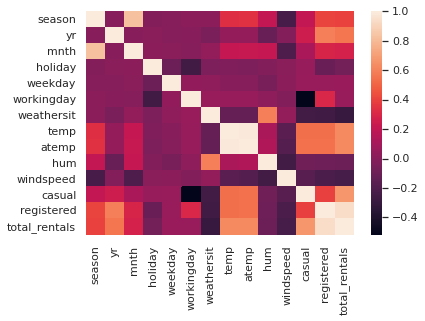

In [50]:
sns.heatmap(df.corr())